### Python Supplementary Text Classification/Visualization Tutorials 

In [38]:
#Importing Relevant Packages
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from lxml import html
#wordcloud
from os import path
from wordcloud import WordCloud, STOPWORDS
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
import numpy as np
from PIL import Image
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

import scattertext as st
import codecs
from pprint import pprint

### As you can recall from previous lessons you can make wordclouds from articles such as the finance article from HW 2.

(-0.5, 1919.5, 1914.5, -0.5)

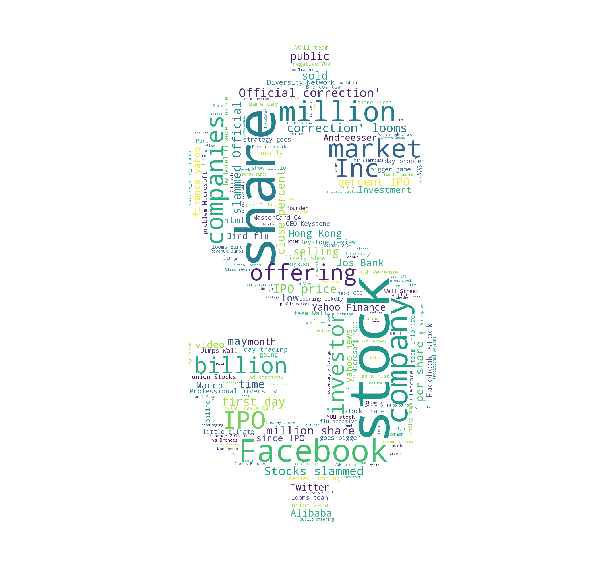

In [39]:
text = open(path.join('data/finance.csv')).read()

d = path.dirname("data/examples/")

# read the mask image
# taken from
# http://www.publicdomainpictures.net/pictures/40000/velka/dollar-sign-black.jpg
dollar = np.array(Image.open(path.join(d, "dollar.png")))

stopwords = set(STOPWORDS)
stopwords.add("cant")
stopwords.add("aint")
stopwords.add("today")
stopwords.add("report")
stopwords.add("permalink")
stopwords.add("ago")
stopwords.add("hour")
stopwords.add("year")
stopwords.add("abuse")
stopwords.add("like")
stopwords.add("new")
stopwords.add("will")
stopwords.add("said")
stopwords.add("wants")
stopwords.add("football")
stopwords.add("NCAA")
stopwords.add("college")
stopwords.add("fumbles")
stopwords.add("Super")
stopwords.add("Bowl")

wordcloud = WordCloud(background_color="white", stopwords=stopwords, mask=dollar).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")

### That is just one way to look at text data. Further below we will look at another way to visualize text data.

## Scattertext 

- Scattertext is an opensourced text visualization library by Jason Kessler

- The code for the library can be viewed here: https://github.com/JasonKessler/scattertext#visualizing-any-kind-of-term-score

- To begin using the library you will need to run 'pip install scattertext' in the command prompt

- Examples regarding political speakers are from the tutorial on the github page

- If for some reason you cannot generate the html files using the code I have included them in the data folder for reference

In [40]:
#Grabbing sample political speaker data
convention_df = st.SampleCorpora.ConventionData2012.get_data()
convention_df

,party,speaker,text
0,democrat,BARACK OBAMA,Thank you. Thank you. Thank you. Thank you so ...
1,democrat,MICHELLE OBAMA,"Thank you so much. Tonight, I am so thrilled a..."
2,democrat,RICHARD DURBIN,Thank you. It is a singular honor to be here t...
3,democrat,JOSEPH BIDEN,"Hey, Delaware. \nAnd my favorite Democrat, Jil..."
4,democrat,JILL BIDEN,"Hello. \nThank you, Angie. I'm so proud of how..."
5,democrat,ANGIE FLORES,My name is Angie Flores and I am a student at ...
6,democrat,JOHN NATHMAN,"Today and every day, our military men and wome..."
7,democrat,JOHN KERRY,Thank you. Thank you.\nIn this — in this campa...
8,democrat,CHARLIE CRIST,"Good evening. \nHalf a century ago, Ronald Rea..."
9,democrat,BRIAN SCHWEITZER,Settle down. Settle down.\nI know Mitt Romney....


In [41]:
#Format data and make corpus
nlp = st.whitespace_nlp_with_sentences
convention_df.groupby('party').apply(lambda x: x.text.apply(lambda x: len(x.split())).sum())
convention_df['parsed'] = convention_df.text.apply(nlp)
corpus = st.CorpusFromParsedDocuments(convention_df, category_col='party', parsed_col='parsed').build()

- The code we will run in the next few blocks creates html page in your tutorial directory for you to look at (open them from file explorer)
- When launching the html page you can see frequencies of words in the articles based on categories (in this case democrat or republican) you can also see the specific articles where they came from

In [42]:
#Make html page
html = st.produce_scattertext_explorer(corpus, category='democrat',category_name='Democratic',  not_category_name='Republican', width_in_pixels=1000, metadata=convention_df['speaker'])
open("Convention-Visualization.html", 'wb').write(html.encode('utf-8'))

- We can also do topic analysis given the code example below

In [43]:
empath_corpus = st.CorpusFromParsedDocuments(convention_df, category_col='party', feats_from_spacy_doc=st.FeatsFromOnlyEmpath(), parsed_col='text').build()
html = st.produce_scattertext_explorer(empath_corpus, category='democrat', category_name='Democratic',not_category_name='Republican', width_in_pixels=1000, metadata=convention_df['speaker'], use_non_text_features=True, use_full_doc=True)
open("Convention-Visualization-Empath.html", 'wb').write(html.encode('utf-8'))

- You can also do word frequencies!

In [44]:
term_freq_df = corpus.get_term_freq_df()

term_freq_df = corpus.get_term_freq_df()
term_freq_df['Republican Score'] = corpus.get_scaled_f_scores('republican')
term_freq_df['Democratic Score'] = corpus.get_scaled_f_scores('democrat')
print("Top 10 Democratic terms")
pprint(list(term_freq_df.sort_values(by='Democratic Score', ascending=False).index[:10]))
print("Top 10 Republican terms")
pprint(list(term_freq_df.sort_values(by='Republican Score', ascending=False).index[:10]))

Top 10 Democratic terms
[u'auto',
 u'america forward',
 u'fought for',
 u'auto industry',
 u'insurance companies',
 u'fair',
 u'pell',
 u'last week',
 u'fighting for',
 u'president barack']
Top 10 Republican terms
[u'unemployment',
 u'liberty',
 u'do better',
 u'built it',
 u'olympics',
 u'big government',
 u'16',
 u'ann',
 u'it has',
 u'reagan']


### Applying it to a seperate dataset

- Dataset used in this example from: https://www.kaggle.com/uciml/news-aggregator-dataset/contributors

In [45]:
articleData = pd.read_csv('data/uci-news-aggregator.csv')

articleData = articleData.drop(['URL', 'HOSTNAME', 'TIMESTAMP', 'STORY', 'Unnamed: 0'], axis=1)
articleData = articleData.loc[articleData['CATEGORY'].isin(['b','t'])]

articleDataSample = articleData.head(10000)
    
articleDataSample

,TITLE,PUBLISHER,CATEGORY
0,"Fed official says weak data caused by weather,...",Los Angeles Times,b
1,Fed's Charles Plosser sees high bar for change...,Livemint,b
2,US open: Stocks fall after Fed official hints ...,IFA Magazine,b
3,"Fed risks falling 'behind the curve', Charles ...",IFA Magazine,b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Moneynews,b
5,Plosser: Fed May Have to Accelerate Tapering Pace,NASDAQ,b
6,Fed's Plosser: Taper pace may be too slow,MarketWatch,b
7,Fed's Plosser expects US unemployment to fall ...,FXstreet.com,b
8,US jobs growth last month hit by weather:Fed P...,Economic Times,b
9,ECB unlikely to end sterilisation of SMP purch...,Interactive Investor,b


In [46]:
#Format data and make corpus
articleDataSample.groupby('CATEGORY').apply(lambda x: x.TITLE.apply(lambda x: len(x.split())).sum())
articleDataSample['parsed'] = articleDataSample.TITLE.apply(nlp)
corpus = st.CorpusFromParsedDocuments(articleDataSample, category_col='CATEGORY', parsed_col='parsed').build()

In [47]:
#Make default scattertext html page
htmlArticle = st.produce_scattertext_explorer(corpus, category='b', category_name='Business',  not_category_name='Tech', width_in_pixels=1000, metadata=articleDataSample['PUBLISHER'])
open("Article-Visualization.html", 'wb').write(htmlArticle.encode('utf-8'))

In [48]:
#Make topic html page
empath_corpusArticle = st.CorpusFromParsedDocuments(articleDataSample, category_col='CATEGORY', feats_from_spacy_doc=st.FeatsFromOnlyEmpath(), parsed_col='TITLE').build()
html = st.produce_scattertext_explorer(empath_corpusArticle, category='b', category_name='Business',not_category_name='Tech', width_in_pixels=1000, metadata=articleDataSample['PUBLISHER'], use_non_text_features=True, use_full_doc=True)
open("Article-Visualization-Empath.html", 'wb').write(html.encode('utf-8'))

In [49]:
#Get term frequencies
term_freq_df = corpus.get_term_freq_df()

term_freq_df = corpus.get_term_freq_df()
term_freq_df['Business Score'] = corpus.get_scaled_f_scores('b')
term_freq_df['Technology Score'] = corpus.get_scaled_f_scores('t')
print("Top 10 Technology Article terms")
pprint(list(term_freq_df.sort_values(by='Technology Score', ascending=False).index[:10]))
print("Top 10 Business Article terms")
pprint(list(term_freq_df.sort_values(by='Business Score', ascending=False).index[:10]))

Top 10 Technology Article terms
['snowden',
 'cosmos',
 'xbox one',
 'os',
 'ios 7',
 'titanfall',
 'nsa',
 'windows',
 'phone',
 'ipad']
Top 10 Business Article terms
['wearhouse',
 'men',
 'jos',
 'candy',
 'candy crush',
 'maker',
 'men s',
 's wearhouse',
 'missing',
 'unemployment']


### Try it yourself!

- I have left some spaces below for you to try running sets of articles through scattertext. 
- One example could be the text classification (HR vs NON HR set)
- Scattertext appears to work best when there are two categories of data (Republic vs Democrat, Tech vs Business)
- Article details need to be utf-8 encoding friendly.

In [50]:
#Import Your Data

In [51]:
#Make Corpus and run regular scattertext plot

In [52]:
#Make topic corpus and run scattertext topic plot